# Analyse d'un bol tibétain

Les [bols tibétains](https://fr.wikipedia.org/wiki/Bol_chantant) sont des bols métalliques (alliages de divers métaux), de symétrie circulaire approximative.  Leur son a la propriété de présenter des battements, c'est-à-dire des modulations d'amplitude périodiques.

Le but du notebook est d'étudier les propriétés spectrales d'un son de bol tibétain.



<IPython.core.display.Javascript object>


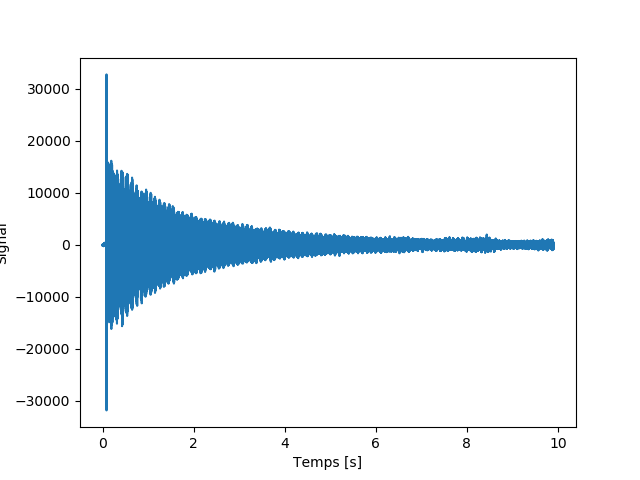

In [6]:
%matplotlib notebook


import numpy as np
import scipy.fftpack as fft
import scipy.io.wavfile as wav
import scipy.signal.windows as ww
import matplotlib.pyplot as plt
import IPython.display

# dimension des figures
W = 9;
H = 4;

fe, sig = wav.read('bol.wav') # chargement
sig = sig.astype(float)

sig = sig[:, 0] # sélection d'un des deux canaux stéréo
L = sig.shape[0]

t = np.arange(L) / fe # temps des échantillons



plt.plot(t, sig)
plt.xlabel('Temps [s]')
plt.ylabel('Signal')
IPython.display.Audio(sig, rate = fe)
#print("sampling frequency {:.3f}".format(fe))


## Fenétrage

Le son n'est pas strictement une somme de sinusoïdes. On sélectionne un court extrait où ses propriétés sont supposées approximativement constantes.

**Q0** Quelle est la fréquence d'échantillonnage ? Quelle est la plus grande fréquence observable dans le signal ?



<IPython.core.display.Javascript object>


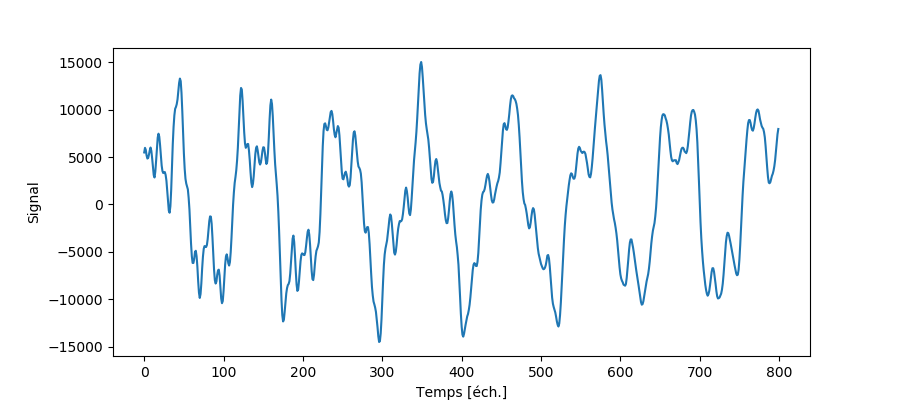

Text(0,0.5,'Signal')

In [7]:
start = 5000 # début de l'extrait
N = 800 # longueur

seg = sig[start:start+N]
plt.figure(figsize=(W,H))
plt.plot(seg);

plt.xlabel('Temps [éch.]')
plt.ylabel('Signal')


## Première analyse

On commence par tracer les valeurs de la TFD du signal.

**Q1** Ce tracé permet-il une analyse pertinente du signal ?



<IPython.core.display.Javascript object>


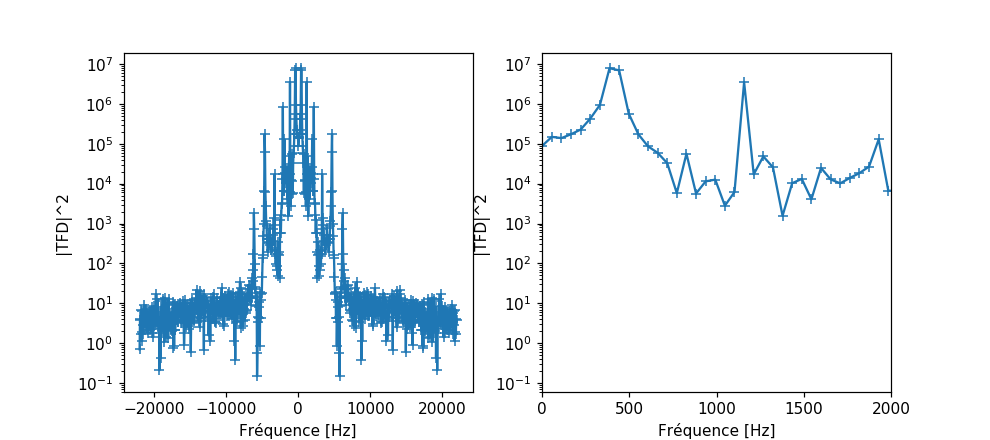

In [9]:

plt.figure(figsize=(W,H))


freq_axis = fft.fftshift(np.arange(N)/N * fe);
freq_axis[freq_axis >= fe/2] = freq_axis[freq_axis >= fe/2] - fe

Fsig = fft.fft(seg)/N

plt.subplot(121)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2), '-+')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2')

plt.subplot(122)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2), '-+')
plt.xlim([0,2000])

plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2');


## Zero-padding

**Q2** Appliquer le zero-padding. Combien de sinusoïdes identifie-t-on ?



<IPython.core.display.Javascript object>


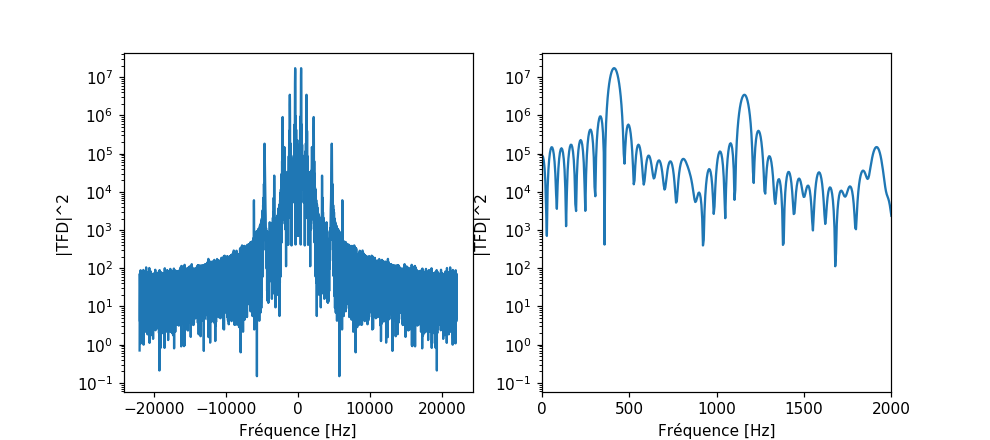

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [10]:

# CORRECTION
Nfft = 10000

plt.figure(figsize=(W,H))
freq_axis = fft.fftshift(np.arange(Nfft)/Nfft * fe);
freq_axis[freq_axis >= fe/2] = freq_axis[freq_axis >= fe/2] - fe

Fsig = fft.fft(seg, Nfft)/N
#

plt.subplot(121)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2))
plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2');

plt.subplot(122)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2))
plt.xlim([0,2000])
plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2');

#

## Fenêtrage

**Q3** Utiliser une fenêtre adaptée pour diminuer l'amplitude des lobes secondaires. Combien de sinusoïdes arrive-t-on à identifier ?



<IPython.core.display.Javascript object>


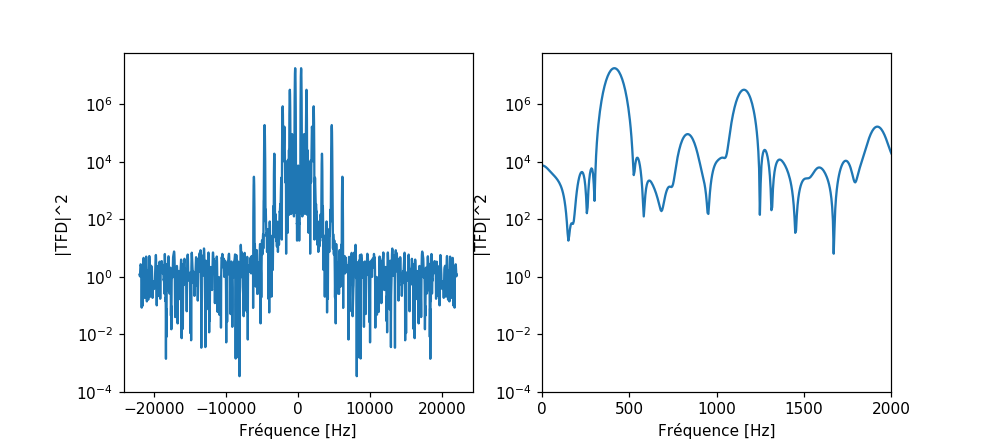

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [11]:

# CORRECTION

hann = ww.hann(N)

plt.figure(figsize=(W,H))
freq_axis = fft.fftshift(np.arange(Nfft)/Nfft * fe);
freq_axis[freq_axis >= fe/2] = freq_axis[freq_axis >= fe/2] - fe

Fsig = fft.fft(seg * hann, Nfft)/ np.sum(hann)

#

plt.subplot(121)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2))
plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2');

plt.subplot(122)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2))
plt.xlim([0,2000])
plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2');



## Amélioration de la résolution

La durée d'observation n'est pas assez longue pour séparer et identifier toutes les composantes du signal.


**Q4** Estimer à l'écoute la fréquence des battements. À l'aide de l'identité trigonométrique permettant d'écrire un produit de cosinus comme une somme de cosinus, estimer une durée d'observation permettant de séparer les composantes du signal.



<IPython.core.display.Javascript object>


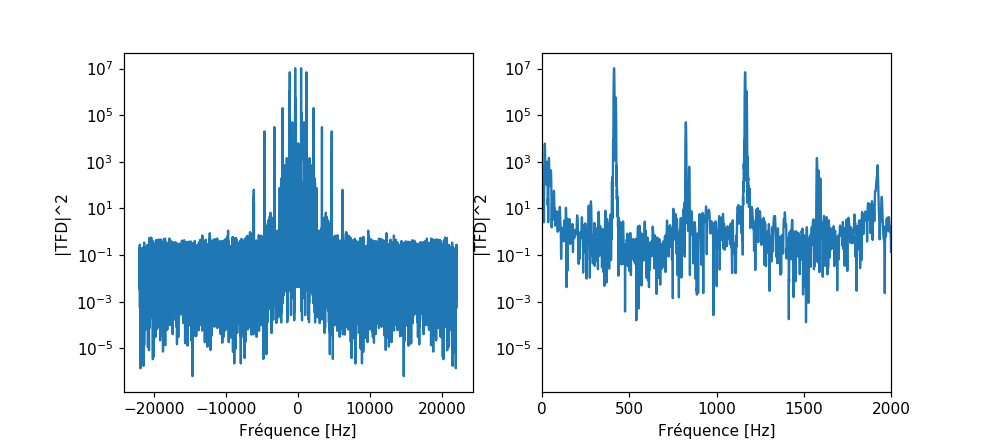

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [17]:


# CORRECTION
start = 5000
N = 20000

seg = sig[start:start+N]
Nfft = 20*N

hann = ww.hann(N)

plt.figure(figsize=(W,H))
freq_axis = fft.fftshift(np.arange(Nfft)/Nfft * fe);
freq_axis[freq_axis >= fe/2] = freq_axis[freq_axis >= fe/2] - fe

Fsig = fft.fft(seg * hann, Nfft)/ np.sum(hann)

#

plt.subplot(121)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2))
plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2');

plt.subplot(122)

plt.semilogy(freq_axis, fft.fftshift(np.abs(Fsig)**2))
plt.xlim([0,2000])
plt.xlabel('Fréquence [Hz]')
plt.ylabel('|TFD|^2');
